## Importing Libraries

In [1]:
import numpy as np
import argparse
import random
import time
import cv2
import os
import matplotlib.pyplot as plt

## Importing Testing Image

In [2]:
image = cv2.imread('Images/1j.jpg')
image = cv2.resize(image, (800,800), interpolation=cv2.INTER_AREA)

In [3]:
image1 = cv2.imread('Images/1j.jpg')
image1 = cv2.resize(image, (800,800), interpolation=cv2.INTER_AREA)

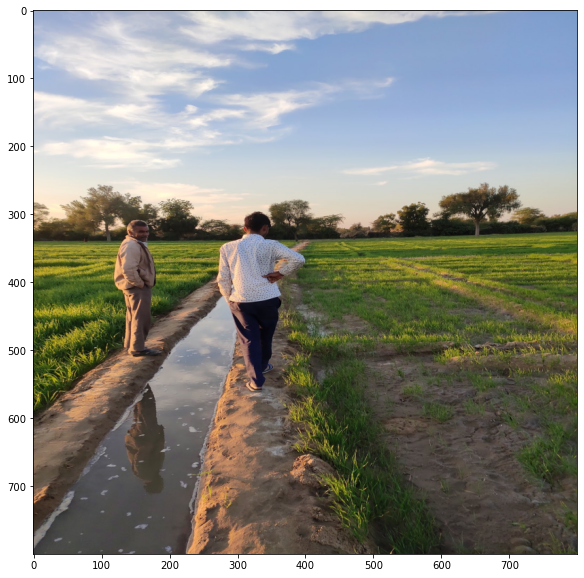

In [4]:
rgb_img = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)

## Detecting Object(Human) in Image using MASK-RCNN-COCO

In [5]:
def Mask(image, net, LABELS, COLORS):
    white = (255, 255, 255)
    black = (0, 0, 0)
    (H, W) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)
    net.setInput(blob)
    boxes, masks = net.forward(["detection_out_final", "detection_masks"])
    detection_count = boxes.shape[2]
    M = []
    BX = []
    for i in range(detection_count):
        box = boxes[0, 0, i]
        score = boxes[0, 0, i, 2]
        classID = int(boxes[0, 0, i, 1])
        x = int(box[3] * W)
        y = int(box[4] * H)
        x2 = int(box[5] * W)
        y2 = int(box[6] * H)
        #BX.append([x, x2, y, y2])
        
        if score > 0.5:
            boxW = x2-x
            boxH = y2-y
            mask = masks[i, classID]
            mask = cv2.resize(mask, (boxW, boxH),interpolation=cv2.INTER_NEAREST)
            mask = (mask > 0.05)
            #M.append(mask)
            roi = image[y:y2, x:x2][mask]
            roi_not  = image[y:y2, x:x2][mask == False]
            blended = ((1 * white) + (0 * roi)).astype("uint8")
            image[y:y2, x:x2][mask] = blended
            image[0:y, :] = black
            image[y2:H, :] = black
            image[:, 0:x] = black
            image[:, x2:W] = black
            image[y:y2, x:x2][mask == False] = ((1 * black) + (0 * roi_not)).astype("uint8")
    return image

In [6]:
LABELS = open('Mask_RCNN_COCO/object_detection_classes_coco.txt').read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")
net = cv2.dnn.readNetFromTensorflow('Mask_RCNN_COCO/frozen_inference_graph.pb',
                                    'Mask_RCNN_COCO/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')

In [7]:
img1 = Mask(image, net, LABELS, COLORS)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

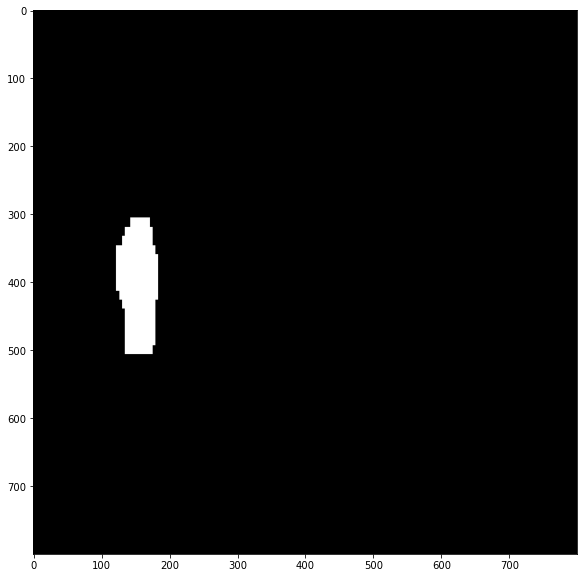

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(img1)

## Masking of Detected Image

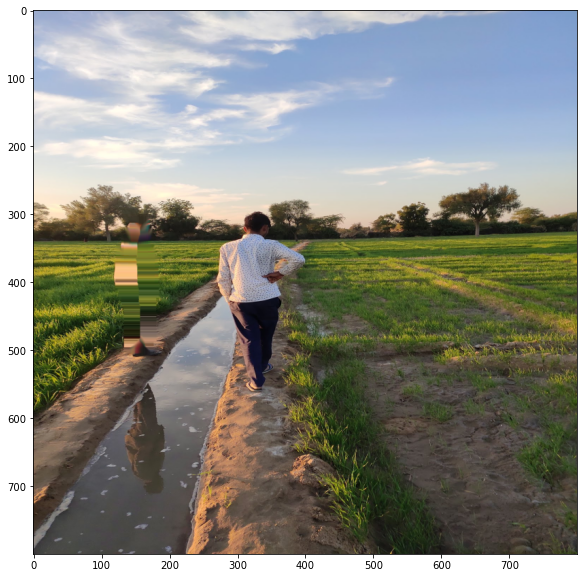

In [9]:
image2 = cv2.inpaint(image1, gray, 1, flags = cv2.INPAINT_NS)
rgb_img1 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgb_img1)